Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL410250 / EEL7513 / EEL7514 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bU}{\mathbf{U}}$
$\newcommand{\bu}{\mathbf{u}}$
$\newcommand{\bT}{\mathbf{T}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 8: Redes Convolucionais

Neste exercício você irá utilizar redes convolucionais para reconhecimento de imagens. Além de treinar uma rede a partir do zero, você irá investigar a técnica de ajuste fino (*fine tuning*) a partir de uma rede pré-treinada (*transfer learning*).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Find out NVIDIA GPU model (randomly assigned by Colab)
# Deep learning performance: K80 < P4 < T4 < P100
# https://ai-benchmark.com/ranking_deeplearning.html
gpu = !nvidia-smi -L
print('Not using GPU' if 'failed' in gpu[0] else gpu[0].split(' (')[0])

# For more GPU information, run: 
# !nvidia-smi

GPU 0: Tesla T4


In [ ]:
def plots(history):
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], '.-', label='Train loss')
  if 'val_loss' in history.history.keys():
    plt.plot(history.history['val_loss'], '.-', label='Val loss')
  plt.xlabel('Epochs');
  plt.legend();
  plt.grid();
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], '.-', label='Train accuracy')
  plt.xlabel('Epochs');
  if 'val_accuracy' in history.history.keys():
    plt.plot(history.history['val_accuracy'], '.-', label='Val accuracy')
  plt.legend();
  plt.grid();

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Reshape, Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, TensorBoard

# 1. Treinando a partir do zero



## MNIST

1. Assim como no exercício anterior, carregue o conjunto MNIST e separe as últimas 5000 imagens como conjunto de validação. No entanto, desta vez não realize qualquer pré-processamento nas imagens (como escalonamento); isto será feito [internamente no modelo](https://keras.io/guides/preprocessing_layers/#preprocessing-data-before-the-model-or-inside-the-model) depois.

11493376/11490434 [==============================] - 0s 0us/step
x_train.dtype: uint8
Train shapes: (55000, 28, 28) (55000,)
  Val shapes: (5000, 28, 28) (5000,)
 Test shapes: (10000, 28, 28) (10000,)


2. Usando o Keras, construa uma rede neural com pelo menos uma camada convolucional (`tf.keras.layers.Conv2D`) e confirme que não há nenhum erro de definição. Organize seu código em uma função de criação do modelo, conforme o exemplo abaixo (dê o nome que preferir). Utilize camadas de escalonamento e *reshape* conforme necessário.

#### Dicas
- Funções úteis: `tf.keras.layers.experimental.preprocessing.Rescaling`, `tf.keras.layers.Reshape`
- Camadas convolucionais 2D exigem que a entrada seja um tensor 3D, sendo o último eixo correspondente ao número de canais (no caso, apenas 1, para uma imagem em tons de cinza).

In [ ]:
def make_model():
  model = Sequential(
      [
       InputLayer(input_shape=(28, 28)), # input images are 28 x 28
       Rescaling(1/255), # preprocessing applied inside the model
       Reshape((28, 28, 1)), # convolutional layer requires shape h x w x n_channels
       Conv2D(???),
       ???
       Dense(10, activation='softmax'),
      ]
  )
  return model
make_model().summary()

3. Desenvolva (i.e., aprimore a arquitetura) e treine sua rede (a partir do zero), tentando conseguir uma acurácia de validação de pelo menos 99.2%. (Lembre que usando apenas camadas densas é difícil conseguir uma acurácia muito superior a 98%.) Em seguida, calcule a acurácia no conjunto de teste.

1. (OPCIONAL) Por que o uso de Dropout faz com que o desempenho de treinamento comece bastante inferior ao de validação?

#### Dicas
- Parta da arquitetura deste [tutorial](https://keras.io/examples/vision/mnist_convnet) (com os devidos ajustes feitos no item anterior) e adicione (após a camada `Flatten`) uma camada densa com um número suficiente de unidades. Lembre-se que (ao contrário do tutorial) estamos trazendo para dentro do modelo qualquer pré-processamento necessário.
- Lembre-se também que, ao contrário do tutorial, não é necessário converter o vetor `y` para one-hot; basta usar a perda `sparse_categorical_crossentropy`.
- Visualize os gráficos do treinamento usando a função `plots` fornecida (ou a ferramenta [TensorBoard](https://www.tensorflow.org/tensorboard/get_started)).
- Ao usar camadas convolucionais com GPU, a execução paralelizada torna impossível garantir a reproducibilidade, portanto, não perca tempo com isso.

## (OPCIONAL) Fashion-MNIST

5. (OPCIONAL) Repita para o conjunto [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), o qual também está [disponível no Keras](https://keras.io/api/datasets/fashion_mnist). Nesse caso, é suficiente aproveitar a mesma arquitetura do modelo e apenas (se necessário) alterar a taxa de aprendizado e o número de épocas. Sem muito esforço é possível conseguir uma acurácia de validação de 92% (em comparação com 87% para uma rede densa). Se desejar, visualize algumas imagens do conjunto de treinamento e algumas predições erradas no conjunto de teste.

## CIFAR-10

Agora, vamos utilizar um conjunto um pouco mais complexo, o [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10), também [disponível no Keras](https://keras.io/datasets/).


In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train.dtype:', x_train.dtype)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.dtype: uint8
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Observe que o `shape` do array `y` precisa ser corrigido:
- Para usar a perda `sparse_categorical_crossentropy`, `y` precisa ser um tensor 1D com valores em `[0, 1, ..., n_classes-1]`
- Para usar a perda `categorical_crossentropy`, `y` precisa ser um tensor 2D com *shape* `(n_samples, n_classes)` e codificação *one-hot*


In [ ]:
# Make sure y is a 1D tensor, so we can use sparse_categorical_crossentropy loss
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, shuffle=False)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(45000, 32, 32, 3) (45000,)
(5000, 32, 32, 3) (5000,)
(10000, 32, 32, 3) (10000,)


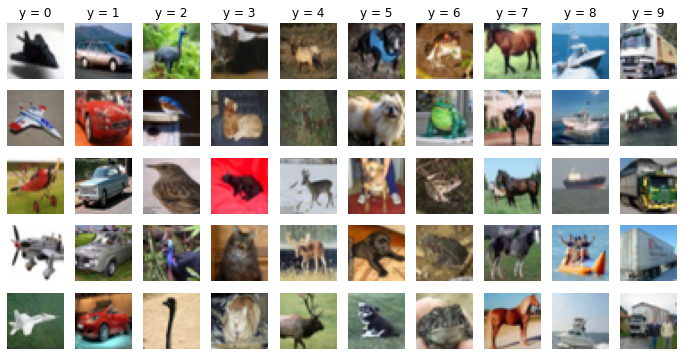

In [ ]:
plt.figure(figsize=(12,6))
for i in range(5):
  for c in range(10):
    plt.subplot(5, 10, 10*i+c+1)
    img = x_train[y_train == c][i]
    plt.imshow(img)
    if i == 0:
      plt.title('y = {}'.format(c))
    plt.axis('off')

6. Inicialmente, apenas converta a mesma arquitetura utilizada no MNIST para o formato das imagens do CIFAR-10 e treine o modelo. Note que agora não é mais necessário usar uma camada `Reshape`. Certifique-se de escolher um batch size e taxa de aprendizado apropriadas. Observe que é difícil obter uma acurácia de validação superior a ~73%.

7. Por que você acha que isso acontece? Explique.

### Data augmentation
Para melhorar o desempenho, utilizaremos a técnica de aumento de dados (*data augmentation*). Há três formas principais de utilizar esta técnica no Keras:
- Usando a função [`tf.keras.preprocessing.image.ImageDataGenerator`](https://keras.io/api/preprocessing/image/#imagedatagenerator-class), a qual opcionalmente permite aplicar transformações aleatórias durante o treinamento. Esta é a abordagem mais clássica, relativamente simples e usada em muitos tutoriais, porém é a menos eficiente computacionalmente.
- Usando a API [tf.data](https://www.tensorflow.org/guide/data#preprocessing_data) do TensorFlow para criar uma pipeline de pré-processamento dos dados de entrada (veja exemplos [aqui](https://keras.io/guides/preprocessing_layers/#preprocessing-data-before-the-model-or-inside-the-model) e [aqui](https://keras.io/examples/vision/image_classification_from_scratch/#two-options-to-preprocess-the-data).). Essa é uma abordagem mais moderna, flexível e mais eficiente computacionalmente que a primeira.
- Usando camadas de *data augmentation* como parte do modelo, as quais aplicam transformações aleatórias *somente* durante o treinamento (ficando inativas fora do treinamento). Esta é uma abordagem recente e ainda experimental. A principal vantagem é tornar as operações mais rápidas pelo uso da GPU, conforme explicado [neste tutorial](https://keras.io/guides/preprocessing_layers/#preprocessing-data-before-the-model-or-inside-the-model) e também [neste](https://keras.io/examples/vision/image_classification_from_scratch/#two-options-to-preprocess-the-data).

Para acelerar o treinamento usaremos aqui a última abordagem. Um exemplo é mostrado abaixo; você pode adicionar outras transformações se desejar.



In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomTranslation
data_augmentation = Sequential(
    [
     RandomTranslation(height_factor=0.1, width_factor=0.1),
     RandomFlip(mode='horizontal'),
    ],
    name='data_augmentation',
)

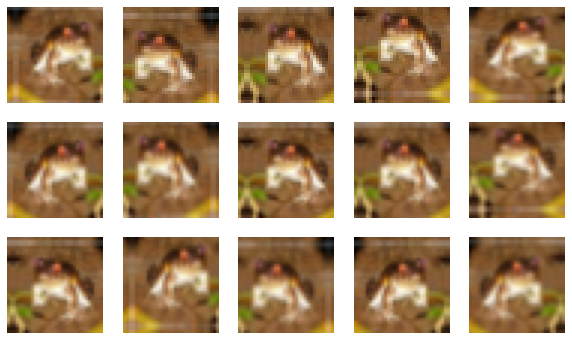

In [ ]:
plt.figure(figsize=(10, 6))
i = 0
for j in range(15):
  img = data_augmentation(x_train[[i]]) # convert to (1, shape) before entering a Keras model
  img = img[0].numpy() # extract numpy array from tf.Tensor object
  # resulting dtype after data augmentation is 'float32'; must convert back to 'uint8' before plotting
  img = img.astype('uint8')
  plt.subplot(3, 5, j+1)
  plt.imshow(img)
  plt.axis('off')

In [ ]:
def make_model():
  model = Sequential(
      [
       Input(shape=(32, 32, 3)),
       data_augmentation,
       Rescaling(1/255),
       Conv2D(???),
       ???
       Dense(10, activation='softmax'),
      ]
  )
  return model
make_model().summary()

8. Treine o modelo até obter pelo menos 80% de acurácia de validação. Note que será preciso um número elevado de épocas (pelo menos 100), o que deve levar vários minutos mesmo com GPU.

#### Dicas
- Certifique-se de usar uma taxa de aprendizado apropriada ao longo de todo o treinamento. Algumas opções incluem:
 - Utilizar um valor constante pequeno por um grande número de épocas (ex: 200) e ter bastante paciência. Em particular, como a função `fit` continua o treinamento do ponto em que parou, você pode treinar por N épocas, observar os resultados, depois continuar o treinamento por mais N épocas, etc. Se for possível alcançar a acurácia desejada com um dado modelo e *batch size*, será possível alcançá-la usando uma taxa de aprendizado constante suficientemente pequena e um número suficientemente grande de épocas.
 - Utilizar alguma regra de decaimento da taxa de aprendizado (*learning rate schedule*), para fazer com que a taxa seja alta no início do treinamento e baixa no final. Isso é feito no Keras através de *callbacks* como a [`ReduceLROnPlateau`](https://keras.io/api/callbacks/reduce_lr_on_plateau/), que implementa um decaimento adaptativo, ou a genérica [`LearningRateScheduler`](https://keras.io/api/callbacks/learning_rate_scheduler/), que permite que você escreva sua própria função customizada.
- Decair a taxa de aprendizado costuma funcionar bem para um *batch size* relativamente pequeno (ex: 16), mas para valores mais altos de *batch size* (e correspondentemente da taxa de aprendizado), a literatura tem observado que o desempenho melhora se são acrescentadas [algumas épocas de *warmup* no início do treinamento](https://arxiv.org/abs/1706.02677), em que a taxa de aprendizado é mantida em um valor constante pequeno ou aumentada linearmente. Isso evita que o treinamento inicie com valores muito altos de um gradiente praticamente aleatório, causando [instabilidade numérica](https://arxiv.org/abs/1812.01187).
- Uma regra de decaimento simples e efetiva para [problemas com restrição de tempo de treinamento](https://arxiv.org/abs/1905.04753), e que tem sido cada vez mais usada nos últimos anos, é o decaimento linear (de `lrmax` até 0, ao longo de `epochs` épocas), a qual tem a grande vantagem de exigir poucos hiperparâmetros. Uma implementação dessa regra, para ser usada com a *callback* `LearningRateScheduler`, é fornecida abaixo (já incluindo um período de *warmup*):
```python
  def schedule(epoch, lr):
    if epoch < warmup_epochs:
      return lrmax*(epoch + 1)/(warmup_epochs + 1)
    return lrmax*(1 - (epoch - warmup_epochs)/(epochs - warmup_epochs))
```
Note que o número total de épocas `epochs`, a taxa de aprendizado máxima `lrmax` e o número de épocas de *warmup* `warmup_epochs` devem estar definidos fora da função.
 
-  Fique à vontade para aprimorar o modelo se desejar. Para facilitar, você pode se basear em quaisquer outras referências ou tutoriais disponíveis, como por exemplo: [Tutorial 1](https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras) ou [Tutorial 2](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification). Note que alguns tutoriais estão desatualizados; por exemplo, a função `fit_generator` tornou-se obsoleta, tendo sido incorporada à função `fit`. No entanto, esteja ciente de que não é necessário um modelo muito complexo para obter a acurácia desejada (duas camadas convolucionais e uma densa além da de saída são suficientes).

# 2. Usando uma rede pré-treinada (*transfer learning & fine-tuning*)

1. Partindo de alguma [rede pré-treinada](https://keras.io/applications/)  fornecida pelo Keras, treine uma rede convolucional para [classificação entre gatos e cachorros](https://www.kaggle.com/c/dogs-vs-cats). Para isto, siga este [tutorial](https://keras.io/guides/transfer_learning) (provavelmente o mais atualizado no momento e escrito pelo próprio criador do Keras). Antes de seguir o tutorial, provavelmente será útil conhecer os conceitos básicos da [API funcional](https://keras.io/guides/functional_api/) do Keras.
1. (OPCIONAL) Experimente outros modelos pré-treinados e/ou outros conjuntos de dados. O [tutorial específico sobre EfficientNet](https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/) pode ser interessante.
1. (OPCIONAL) Se desejar, você pode aplicar um modelo pré-treinado para classificar o CIFAR-10. No entanto, para obter um desempenho satisfatório nesse caso, será necessário previamente alargar (*resize*) as imagens para um tamanho mais próximo do das imagens da ImageNet (`224 x 224`), para que os filtros treinados possam ser relevantes. Por outro lado, um alargamento excessivo pode introduzir distorções (*artifacts*) que podem prejudicar o desempenho.

#### Dicas
- Antes de aplicar um modelo pré-treinado, geralmente é necessário realizar algum pré-processamento exigido pelo modelo. Ao invés de realizar esse pré-processamento manualmente, como feito no tutorial, é suficiente e mais conveniente utilizar a função `preprocess_input`, disponível no módulo de cada modelo pré-treinado. Por exemplo:
```python
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
base_model = ResNet50V2(include_top=False, input_shape=(150, 150, 3), pooling='avg')
base_model.trainable = False
(...)
x = preprocess_input(x)
x = base_model(x, training=False)
(...)
```
- Para inspecionar as camadas do modelo pré-treinado, utilize `base_model.summary()`
- Antes de utilizar um modelo com a opção `include_top=False`, é útil inspecionar o modelo completo (com a opção `include_top=True`), uma vez que será necessário recriar (e retreinar) as camadas finais removidas.
- Outras referências interessantes (embora mais antigas): [Tutorial 3](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/) e [Tutorial 4](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)

# 3. (OPCIONAL) Visualizando os padrões aprendidos

1. (OPCIONAL) Para alguma rede convolucional à sua escolha, visualize o que cada camada da rede "aprendeu"; mais precisamente, mostre exemplos de imagens de entrada que maximizam a ativação dos filtros em cada camada. Para isso, siga este [tutorial](https://keras.io/examples/vision/visualizing_what_convnets_learn/).